In [1]:
#---------------------------------------------Importing Required Libraries-----------------------------------
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
sns.set(color_codes=True)
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split #--------------splitting data into test and train
from sklearn.tree import DecisionTreeClassifier #-----------Building decision tree model
from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score, confusion_matrix #-----model validation scores
%matplotlib inline
from IPython.display import display #---------------------for displaying multiple data frames in one output
from sklearn.feature_extraction.text import CountVectorizer  #DT does not take strings as input for the model fit step
import missingno as msno_plot #--------------plotting missing values

In [3]:
df = pd.read_csv("classification_input_for_python.txt", sep = "\t")

In [4]:
df.describe().transpose().round(2)

,count,mean,std,min,25%,50%,75%,max
bio15_cfp,17539.0,0.00,1.00,-7.24,-0.77,-0.06,0.73,5.35
bio2_cfp,17539.0,0.00,1.00,-4.86,-0.74,0.00,0.76,3.83
bio3_cfp,17539.0,-0.00,1.00,-5.52,-0.65,-0.01,0.77,4.08
cec_ntest_0_5,17539.0,0.00,1.00,-4.34,-0.75,-0.07,0.69,4.76
cfvo_ntest_0_5,17539.0,-0.00,1.00,-3.68,-0.75,0.03,0.72,3.97
clay_ntest_0_5,17539.0,-0.00,1.00,-5.27,-0.76,0.00,0.69,5.38
ocd_ntest_0_5,17539.0,-0.00,1.00,-4.52,-0.66,-0.02,0.65,3.98
cluster_category,17539.0,4.76,3.41,1.00,1.00,6.00,8.00,10.00


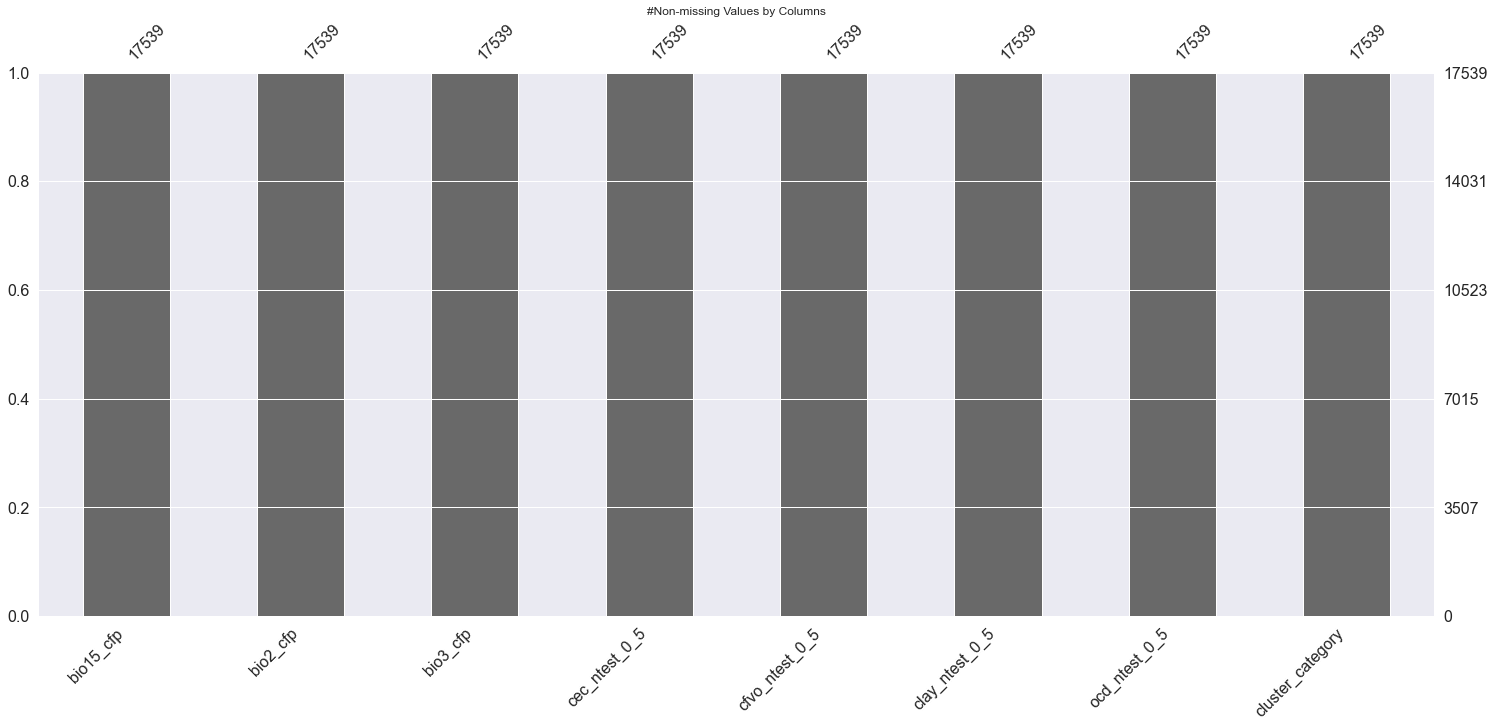

In [14]:
#-------------------------------------------Barplot of non-missing values--------------------------------
plt.title('#Non-missing Values by Columns')
msno_plot.bar(df);

c:\users\gzl02\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\gzl02\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\gzl02\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keywor

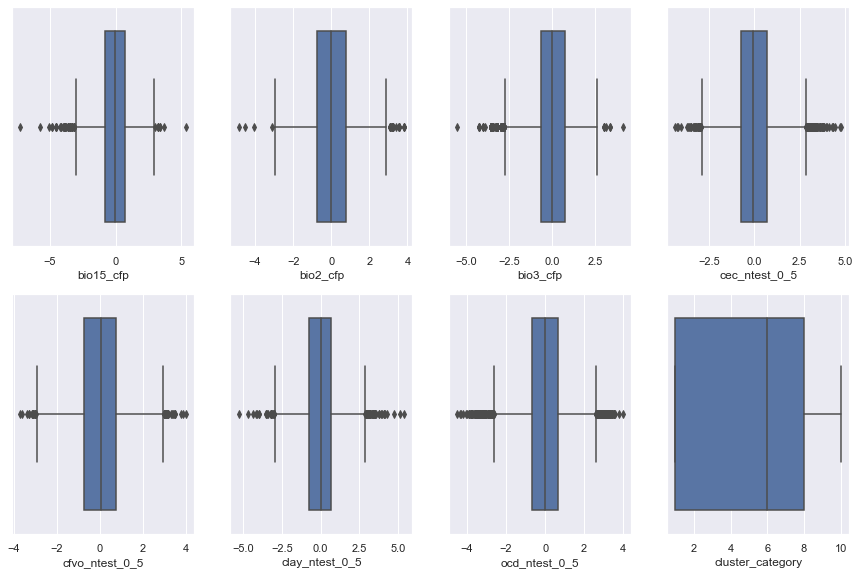

In [16]:
#--Checking Outliers
plt.figure(figsize=(15,15))
pos = 1
for i in df.columns:
    plt.subplot(3, 4, pos)
    sns.boxplot(df[i])
    pos += 1

c:\users\gzl02\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


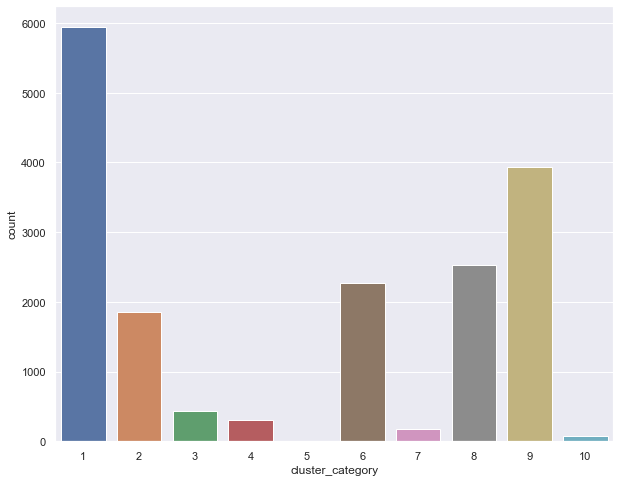

In [18]:
plt.figure(figsize=(10,8))
sns.countplot(df['cluster_category']);

In [5]:
# splitting data into training and test set for independent attributes
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(df.drop('cluster_category',axis=1), df['cluster_category'], test_size=.3,
                                                   random_state=22)
X_train.shape,X_test.shape

((12277, 7), (5262, 7))

In [21]:
clf_pruned = DecisionTreeClassifier(criterion = "gini", random_state = 0,
                               max_depth=10, min_samples_leaf=1000,class_weight = "balanced")
clf_pruned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=1000, random_state=0)

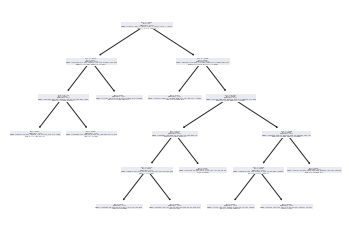

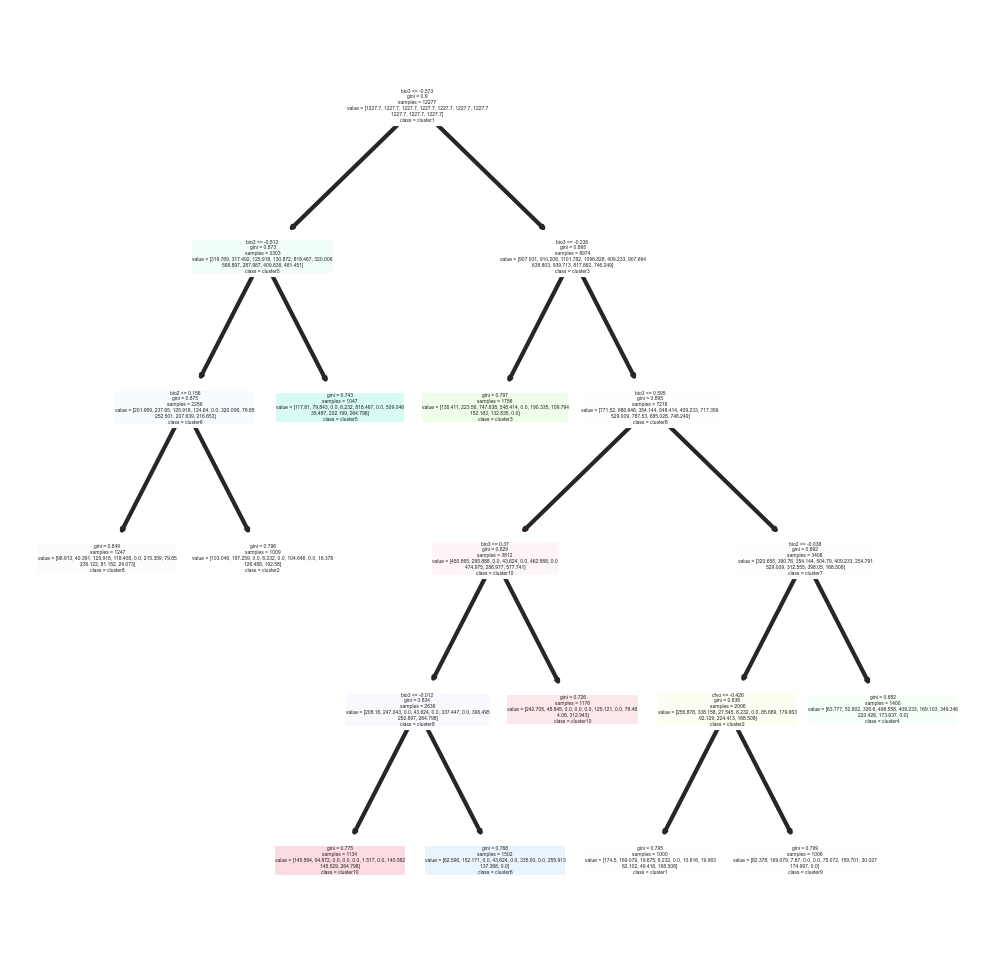

In [22]:
from sklearn import tree
tree.plot_tree(clf_pruned)
fn=['bio15','bio2','bio3','cec','cfvo','clay','ocd']
cn=['cluster1', 'cluster2', 'cluster3', 'cluster4', 'cluster5','cluster6','cluster7','cluster8','cluster9','cluster10']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
##visualize using mat
tree.plot_tree(clf_pruned,
               feature_names = fn, 
               class_names=cn,
               filled = True);

tree.export_graphviz(clf_pruned,
                     out_file="tree.dot",
                     feature_names = fn, 
                     class_names=cn,
                     filled = True)

fig.savefig('tree.png')

In [8]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus
import graphviz
xvar = df.drop('cluster_category', axis=1)
feature_cols = xvar.columns
dot_data = StringIO()
export_graphviz(clf_pruned, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['1','2','3','4','5','6','7','8','9','10'])
from pydot import graph_from_dot_data
(graph, ) = graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

FileNotFoundError: [WinError 2] "dot" not found in path.